In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':'14'})
rc('text', usetex=True)

In [2]:
Ls     = 2.44e-8
Ls_low = 2.1e-8
fac    = 1e-6 * 0.01

fac_P = 0.4
fac_T = (140-100) / (8000-4000)
fac_EES   = 0.8  # 20% reduction
fac_phase = 0.82 # 18% reduction
fac_imp   = 0.8  # 20% reduction

Tcmb = 4000.0
Pcmb = 135e0

In [3]:
p = {}

# O16: electrical conductivity of hcp iron
p['O16'] = {}
p['O16']['r'] = 31e0 * fac
p['O16']['T'] = 2490e0
p['O16']['P'] = 140e0
p['O16']['k'] = Ls     * p['O16']['T']/ p['O16']['r']
p['O16']['kl']= Ls_low * p['O16']['T']/ p['O16']['r']
p['O16']['ke']= p['O16']['k'] * fac_phase * fac_imp + fac_T*(Tcmb-p['O16']['T'])

# X18: electrical conductivity of hcp iron
# Digitised using webdigitiser
p['X18'] = {}
p['X18']['r'] = 73.07407407407408 * fac
p['X18']['T'] = 3495.0495049504957 
p['X18']['P'] = 142e0
p['X18']['k'] = Ls     * p['X18']['T']/ p['X18']['r']
p['X18']['kl']= Ls_low * p['X18']['T']/ p['X18']['r']
p['X18']['ke']= p['X18']['k'] * fac_phase * fac_imp + fac_T*(Tcmb-p['X18']['T'])

# Z20: electrical conductivity of hcp iron -> Z20 infers 70\pm10
# Z20: 1994.5131898913412, 43.71040723981902 - green star. 
p['Z20'] = {}
p['Z20']['r'] = 46.25925925925925 * fac
p['Z20']['T'] = 2381.188118811882 
p['Z20']['P'] = 142e0
p['Z20']['k'] = Ls     * p['Z20']['T']/ p['Z20']['r']
p['Z20']['kl']= Ls_low * p['Z20']['T']/ p['Z20']['r']
p['Z20']['ke']= p['Z20']['k'] * fac_phase * fac_imp + fac_T*(Tcmb-p['Z20']['T'])

# Inoue et al (2021) Table 1. 
p['I21'] = {}
p['I21']['T'] = np.array([3120, 1940]) 
p['I21']['P'] = np.array([99  , 99])
p['I21']['r'] = np.array([70.4, 73.0]) * fac
p['I21']['k'] = Ls     * p['I21']['T']/ p['I21']['r']
p['I21']['kl']= Ls_low * p['I21']['T']/ p['I21']['r']
p['I21']['c'] = ["4","6"] 
p['I21']['ke']= p['I21']['k'] * fac_phase + fac_T*(Tcmb-p['I21']['T']) + fac_P*(Pcmb - p['I21']['P'])

In [4]:
# Konopkova
p['K16'] = {}
p['K16']['T'] = 3152.5 
p['K16']['P'] = 112.0
p['K16']['k'] = 35.0
p['K16']['ke']= p['K16']['k'] * fac_phase * fac_imp + fac_T*(Tcmb-p['K16']['T']) + fac_P*(Pcmb - p['K16']['P'])

# Hseih is crystalline
# Fe0.96Si0.04, Supp Tab 1
# Fe0.93Si0.07, Supp Tab 2
# Fe0.85Si0.15, Supp Tab 3
p['H20'] = {}
p['H20']['T'] = [2050, 3100] 
p['H20']['P'] = [125 , 132]
p['H20']['k'] = [64  , 22]
p['H20']['c'] = ["4"  ,"15"]
p['H20']['ke']= np.array(p['H20']['k']) * fac_phase + fac_T*(Tcmb-np.array(p['H20']['T'])) + fac_P*(Pcmb-np.array(p['H20']['P']))

# Some additional data to show effect of LEs
#Col 1 from Fe0.96Si0.04
#Col 2 from Fe0.93Si0.07
#Col 3 & 4 from Fe0.85Si0.15
p['H20a1'] = {}
p['H20a1']['T'] = [2050, 2050, 2200, 2700] 
p['H20a1']['P'] = [70  , 70  , 73  , 73]
p['H20a1']['k'] = [50  , 49  , 32  , 48]
p['H20a1']['c'] = ["4"  , "7"  , "15"  , "15"]
p['H20a1']['ke']= np.array(p['H20a1']['k']) * fac_phase + fac_T*(Tcmb-np.array(p['H20a1']['T'])) + fac_P*(Pcmb-np.array(p['H20a1']['P']))

In [5]:
print('{:5} {:10} {:10} {:10} {:10}'.format("Study", "T_inc", "PI_dec", "k_orig", "k_extrap"))
print('O16 {:10.6}{:10.6}{:10.6}{:10.6}'
      .format(fac_T*(Tcmb-p['O16']['T']), p['O16']['k']-p['O16']['k']*fac_phase*fac_imp, p['O16']['k'], p['O16']['ke']))
print('X18, {:10.6}{:10.6}{:10.6}{:10.6}'
      .format(fac_T*(Tcmb-p['X18']['T']), p['X18']['k']-p['X18']['k']*fac_phase*fac_imp, p['X18']['k'], p['X18']['ke']))
print('Z20, {:10.6}{:10.6}{:10.6}{:10.6}'
      .format(fac_T*(Tcmb-p['Z20']['T']), p['Z20']['k']-p['Z20']['k']*fac_phase*fac_imp, p['Z20']['k'], p['Z20']['ke']))
print('I21, ', fac_T*(Tcmb-p['I21']['T']), p['I21']['k']-p['I21']['k']*fac_phase, p['I21']['k'], p['I21']['ke'])
print('K16, {:10.6}{:10.6}{:10.6}{:10.6}'
      .format(fac_T*(Tcmb-p['K16']['T']), p['K16']['k']-p['K16']['k']*fac_phase*fac_imp, p['K16']['k'], p['K16']['ke']))

Study T_inc      PI_dec     k_orig     k_extrap  
O16       15.1   67.4196   195.987   143.668
X18,     5.0495   40.1456   116.702   81.6063
Z20,    16.1881   43.2059   125.599   98.5808
I21,  [ 8.8 20.6] [19.46454545 11.67189041] [108.13636364  64.84383562] [111.87181818  88.17194521]
K16,      8.475     12.04      35.0    40.635


In [6]:
#Pozzo 2012
p['P12'] = {}
p['P12']['T'] = 4700e0 
p['P12']['P'] = 135e0
p['P12']['k'] = 159e0
  
#Pozzo 2013
p['P13'] = {}
p['P13']['T'] = [4260e0, 4385e0] 
p['P13']['P'] = [134e0 , 166e0]
p['P13']['k'] = [107e0 , 109e0]
p['P13']['c'] = ["10", "8"]
p['P13']['ke']= np.array(p['P13']['k']) * fac_EES 

#Pozzo & Alfe 2016
p['P16'] = {}
p['P16']['T'] = 3350e0 
p['P16']['P'] = 97e0
p['P16']['r'] = 0.716e-6
p['P16']['k'] = Ls     * p['P16']['T']/ p['P16']['r']
p['P16']['kl']= Ls_low * p['P16']['T']/ p['P16']['r']

#Gomi 2013
p['G13'] = {}
p['G13']['T'] = 4000e0 
p['G13']['P'] = 135e0
p['G13']['k'] = 170e0

# De Koker et al 2013
p['D12'] = {}
p['D12']['T'] = 4000e0 
p['D12']['P'] = 135e0
p['D12']['k'] = 140e0

p['D12si'] = {}
p['D12si']['T'] = [4000e0, 4000e0] 
p['D12si']['P'] = [135e0 , 135e0]
p['D12si']['k'] = [120, 95]
p['D12si']['c'] = ["12", "25"]
p['D12si']['ke']= np.array(p['D12si']['k']) * fac_EES 

p['D12o'] = {}
p['D12o']['T'] = [4000e0, 4000e0] 
p['D12o']['P'] = [135e0 , 135e0]
p['D12o']['k'] = [120, 105]
p['D12o']['c'] = ["12", "25"]
p['D12o']['ke']= np.array(p['D12o']['k']) * fac_EES 

D12 =  [96. 84.] [120, 105]
D12 =  [96. 76.] [120, 95]
P13 =  [85.6 87.2] [107.0, 109.0]
O16 =  143.66753548387095 195.98709677419356
K16 =  40.635000000000005 35.0
X18 =  81.60628805708751 116.70241327224461
H20 =  [75.98 28.24] [64, 22]
Z20 =  98.58081189704241 125.59861750786773
I20 =  [111.87181818  88.17194521] [108.13636364  64.84383562]


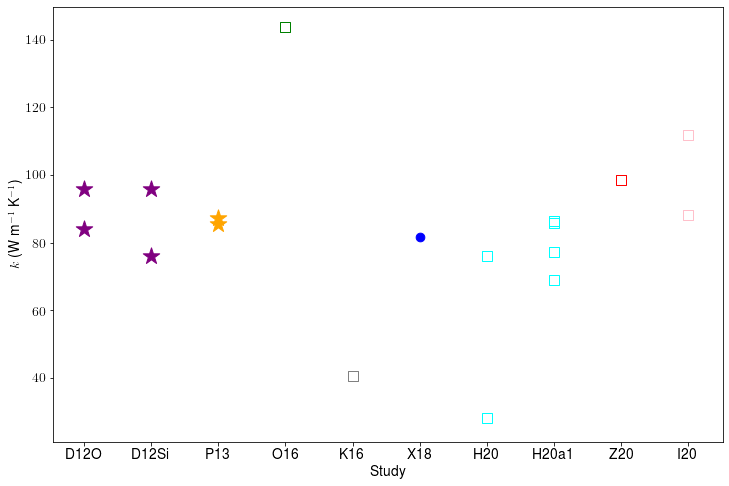

In [15]:
print('D12 = ', p['D12o']['ke'] , p['D12o']['k'] )
print('D12 = ', p['D12si']['ke'], p['D12si']['k'] )
print('P13 = ', p['P13']['ke']  , p['P13']['k'])
print('O16 = ', p['O16']['ke']  , p['O16']['k'])
print('K16 = ', p['K16']['ke']  , p['K16']['k'])
print('X18 = ', p['X18']['ke']  , p['X18']['k'])
print('H20 = ', p['H20']['ke']  , p['H20']['k'])
print('Z20 = ', p['Z20']['ke']  , p['Z20']['k'])
print('I20 = ', p['I21']['ke']  , p['I21']['k'])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(["D12O" , "D12O"] , p['D12o']['ke'] , color="purple", marker='*', s=300)
ax.scatter(["D12Si", "D12Si"], p['D12si']['ke'], color="purple", marker='*', s=300)
ax.scatter(["P13", "P13"]    , p['P13']['ke']  , color="orange", marker='*', s=300)
ax.scatter(["O16"]           , p['O16']['ke']  , color="green" , marker='s', s=100, facecolor="none")
ax.scatter(["K16"]           , p['K16']['ke']  , color="grey"  , marker='s', s=100, facecolor="none")
ax.scatter(["X18"]           , p['X18']['ke']  , color="b"     , marker='.', s=300)
ax.scatter(["H20","H20"]     , p['H20']['ke']  , color="cyan"  , marker='s', s=100, facecolor="none")
ax.scatter(["H20a1","H20a1", "H20a1", "H20a1"] , p['H20a1']['ke'] , color="cyan"  , marker='s', s=100, facecolor="none")
ax.scatter(["Z20"]           , p['Z20']['ke']  , color="r"     , marker='s', s=100, facecolor="none")
ax.scatter(["I20", "I20"]    , p['I21']['ke']  , color="pink"  , marker='s', s=100, facecolor="none")
ax.set_xlabel("Study")
ax.set_ylabel("$k$ (W m$^{-1}$ K$^{-1}$)")
fig.savefig("kextrap.pdf", format="pdf")

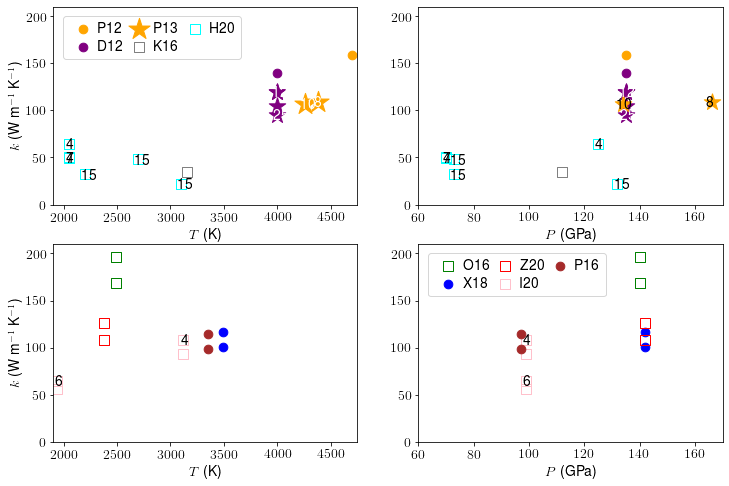

In [12]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

# GOMI ET AL 2016

# Colour      = study
# open/closed = method (experiment, calculation)
# Shape       = material (liquid, solid, etc), star = not Fe

ax1.set_xlim([1900,4750])
ax1.set_ylim([0,210])
ax1.set_xlabel("$T$ (K)")
ax1.set_ylabel("$k$ (W m$^{-1}$ K$^{-1}$)")
ax1.scatter(p['P12']['T']  , p['P12']['k']  , label="P12", color="orange", marker='.', s=300)
ax1.scatter(p['D12']['T']  , p['D12']['k']  , label="D12", color="purple", marker='.', s=300)
ax1.scatter(p['D12si']['T'], p['D12si']['k'],              color="purple", marker='*', s=300)
ax1.scatter(p['D12o']['T'] , p['D12o']['k'] ,              color="purple", marker='*', s=300)
ax1.scatter(p['P13']['T']  , p['P13']['k']  , label="P13", color="orange", marker='*', s=500)
ax1.scatter(p['K16']['T']  , p['K16']['k']  , label="K16", color="grey"  , marker='s', s=100, facecolor="none")
ax1.scatter(p['H20']['T']  , p['H20']['k']  , label="H20", color="cyan"  , marker='s', s=100, facecolor="none")
ax1.scatter(p['H20']['T']  , p['H20']['k']               , color="cyan"  , marker='s', s=100, facecolor="none")
ax1.scatter(p['H20a1']['T'], p['H20a1']['k']             , color="cyan"  , marker='s', s=100, facecolor="none")
i = 0
for x in range(0,len(p['H20a1']['k'])):
    ax1.text(p['H20a1']['T'][i]-30, p['H20a1']['k'][i]-5, p['H20a1']['c'][i])
    i = i + 1
i = 0
for x in range(0,len(p['H20']['k'])):
    ax1.text(p['H20']['T'][i]-30  , p['H20']['k'][i]-5  , p['H20']['c'][i])
    i = i + 1
i = 0
for x in range(0,len(p['P13']['k'])):
    ax1.text(p['P13']['T'][i]-40  , p['P13']['k'][i]-5  , p['P13']['c'][i], color="white")
    i = i + 1
i = 0 
for x in range(0,len(p['D12si']['k'])):
    ax1.text(p['D12si']['T'][i]-40, p['D12si']['k'][i]-5, p['D12si']['c'][i], color="white")
    i = i + 1
    
ax2.set_xlim([60,170])
ax2.set_ylim([0,210])
ax2.set_xlabel("$P$ (GPa)")
#ax2.set_ylabel("$k$ (W/m/K)")
ax2.scatter(p['P12']['P']  , p['P12']['k']  , label="P12", color="orange", marker='.', s=300)
ax2.scatter(p['D12']['P']  , p['D12']['k']  , label="D12", color="purple", marker='.', s=300)
ax2.scatter(p['D12si']['P'], p['D12si']['k'], color="purple", marker='*', s=300)
ax2.scatter(p['D12o']['P'] , p['D12o']['k'] , color="purple", marker='*', s=300)
ax2.scatter(p['P13']['P']  , p['P13']['k']  , label="P13", color="orange", marker='*', s=300)
ax2.scatter(p['K16']['P']  , p['K16']['k']  , label="K16", color="grey"  , marker='s', s=100, facecolor="none")
ax2.scatter(p['H20']['P']  , p['H20']['k']  , label="H20", color="cyan"  , marker='s', s=100, facecolor="none")
ax2.scatter(p['H20a1']['P'], p['H20a1']['k']             , color="cyan"  , marker='s', s=100, facecolor="none")
i = 0
for x in range(0,len(p['H20a1']['k'])):
    ax2.text(p['H20a1']['P'][i]-1, p['H20a1']['k'][i]-5, p['H20a1']['c'][i])
    i = i + 1
i = 0
for x in range(0,len(p['H20']['k'])):
    ax2.text(p['H20']['P'][i]-1  , p['H20']['k'][i]-5  , p['H20']['c'][i])
    i = i + 1
i = 0
for x in range(0,len(p['P13']['k'])):
    ax2.text(p['P13']['P'][i]-2  , p['P13']['k'][i]-5  , p['P13']['c'][i], color="black")
    i = i + 1   
i = 0 
for x in range(0,len(p['D12si']['k'])):
    ax2.text(p['D12si']['P'][i]-2, p['D12si']['k'][i]-5, p['D12si']['c'][i], color="white")
    i = i + 1
ax1.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left',ncol=3, handletextpad=0.1, labelspacing=0.3, columnspacing=0.1)

ax3.set_xlim([1900,4750])
ax3.set_ylim([0,210]) 
ax3.set_xlabel("$T$ (K)")
ax3.set_ylabel("$k$ (W m$^{-1}$ K$^{-1}$)")
ax3.scatter(p['O16']['T'], p['O16']['k'], label="O16", color="green" , marker='s', s=100, facecolor="none")
ax3.scatter(p['X18']['T'], p['X18']['k'], label="X18", color="b"     , marker='.', s=300)
ax3.scatter(p['Z20']['T'], p['Z20']['k'], label="Z20", color="r"     , marker='s', s=100, facecolor="none")
ax3.scatter(p['I21']['T'], p['I21']['k'], label="I20", color="pink"  , marker='s', s=100, facecolor="none")
ax3.scatter(p['P16']['T'], p['P16']['k'], label="P16", color="brown" , marker='.', s=300)
ax3.scatter(p['O16']['T'], p['O16']['kl'], label="O16", color="green" , marker='s', s=100, facecolor="none")
ax3.scatter(p['X18']['T'], p['X18']['kl'], label="X18", color="b"     , marker='.', s=300)
ax3.scatter(p['Z20']['T'], p['Z20']['kl'], label="Z20", color="r"     , marker='s', s=100, facecolor="none")
ax3.scatter(p['I21']['T'], p['I21']['kl'], label="I20", color="pink"  , marker='s', s=100, facecolor="none")
ax3.scatter(p['P16']['T'], p['P16']['kl'], label="P16", color="brown" , marker='.', s=300)
i = 0
for x in range(0,len(p['I21']['k'])):
    ax3.text(p['I21']['T'][i]-25  , p['I21']['k'][i]-5  , p['I21']['c'][i])
    i = i + 1

ax4.set_xlim([60,170])
ax4.set_ylim([0,210])
ax4.set_xlabel("$P$ (GPa)")
#ax4.set_ylabel("$k$ (W m$^{-1}$ K$^{-1}$)")
ax4.scatter(p['O16']['P'], p['O16']['k'], label="O16", color="green" , marker='s', s=100, facecolor="none")
ax4.scatter(p['X18']['P'], p['X18']['k'], label="X18", color="b"     , marker='.', s=300)
ax4.scatter(p['Z20']['P'], p['Z20']['k'], label="Z20", color="r"     , marker='s', s=100, facecolor="none")
ax4.scatter(p['I21']['P'], p['I21']['k'], label="I20", color="pink"  , marker='s', s=100, facecolor="none")
ax4.scatter(p['P16']['P'], p['P16']['k'], label="P16", color="brown" , marker='.', s=300)
ax4.scatter(p['O16']['P'], p['O16']['kl'], color="green" , marker='s', s=100, facecolor="none")
ax4.scatter(p['X18']['P'], p['X18']['kl'], color="b"     , marker='.', s=300)
ax4.scatter(p['Z20']['P'], p['Z20']['kl'], color="r"     , marker='s', s=100, facecolor="none")
ax4.scatter(p['I21']['P'], p['I21']['kl'], color="pink"  , marker='s', s=100, facecolor="none")
ax4.scatter(p['P16']['P'], p['P16']['kl'], color="brown" , marker='.', s=300)
i = 0
for x in range(0,len(p['I21']['k'])):
    ax4.text(p['I21']['P'][i]-1  , p['I21']['k'][i]-5  , p['I21']['c'][i])
    i = i + 1
ax4.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left',ncol=3, handletextpad=0.1, labelspacing=0.3, columnspacing=0.1)

fig.savefig("ksummary.pdf", format="pdf")

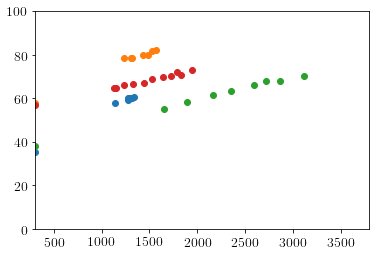

In [9]:
T2 = [300, 1140, 1280, 1280, 1290, 1300, 1320, 1340]
r2 = [35.3, 57.9, 59.3, 60.3, 59.9, 60.4, 60.3, 60.8]

T4 = [300, 1230, 1310, 1320, 1430, 1480, 1530, 1570]
r4 = [57.7,78.7, 78.4, 78.8, 80.2, 80.2, 81.6, 82.2]

T4_99 = [300 , 1650, 1890, 2160, 2350, 2590, 2720, 2860, 3120]
r4_99 = [37.9, 55.1, 58.5, 61.7, 63.6, 66.0, 67.8, 67.8, 70.4]

T6_99 = [300, 1130, 1150, 1230, 1330, 1440, 1530, 1640, 1720, 1830, 1790, 1940]
r6_99 = [57.1, 65.0, 64.8, 66.0, 66.7, 67.3, 68.9, 69.7, 70.2, 71.0, 72.0, 73.0]

plt.xlim([300,3800])
plt.ylim([0,100])
plt.scatter(T2, r2, label="44 GPa 2 wt%")
plt.scatter(T4, r4, label="44 GPa 4 wt%")
plt.scatter(T4_99, r4_99, label="99 GPa 4 wt%")
plt.scatter(T6_99, r6_99, label="99 GPa 6.5 wt%")
#plt.legend()

In [10]:
#Comparison of k at fixed T: 
#P16 gives: 4350 97 0.716 (2)
#           4350 338 0.437

k1_p16 = Ls  * 4350.0/ 0.716e-6
k2_p16 = Ls  * 4350.0/ 0.437e-6
print('P16: ',k1_p16, k2_p16, (k2_p16-k1_p16)/(338-97))

k1_d12 = 95
k2_d12 = 125
print('D12: ',k1_d12, k2_d12, (k2_d12-k1_d12)/(240-95))

k1_o20 = Ls  * 300.0/ 57.7e-8
k2_o20 = Ls  * 300.0/ 37.9e-8
print('O20: ',k1_o20, k2_o20, (k2_o20-k1_o20)/(99-46))

k1_o20 = Ls  * 1570.0/ 82.2e-8
k2_o20 = Ls  * 1650.0/ 55.1e-8
print('O20: ',k1_o20, k2_o20, (k2_o20-k1_o20)/(99-46))

print(0.4*40, 0.5*40)

P16:  148.24022346368716 242.883295194508 0.39270984120672553
D12:  95 125 0.20689655172413793
O20:  12.68630849220104 19.313984168865435 0.12505048446536596
O20:  46.60340632603406 73.0671506352087 0.49931593036178573
16.0 20.0
